# Microsft Bing Image Search Download

Using Microsoft Bing to download images of different foods.

Source: https://docs.microsoft.com/en-us/azure/cognitive-services/bing-image-search/quickstarts/python

**Note:** The docs link above says to use `"https://api.cognitive.microsoft.com/bing/v7.0/images/search"` as the search API URL but due to API changes, the correct link to use is `"https://api.bing.microsoft.com/v7.0/images/search"`. This is true for API instances made after October 30, 2020.

In [1]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import streamlit as st

subscription_key = st.secrets["microsoft_bing_image_search_key"]

# search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search" # OLD
search_url = "https://api.bing.microsoft.com/v7.0/images/search" # New (after Oct 30, 2020)


2021-12-16 15:10:57.768 INFO    numexpr.utils: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-12-16 15:10:57.768 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [2]:
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

## Create and send a search request

In [3]:
search_term = "apple"

# See list of params here - https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters 
params = {
    "q": search_term,
    "license": "public",
    "imageType": "photo"
}

In [4]:
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status() # used for debugging
search_results = response.json()

# Get first 16 thumbnail URLs
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]

In [5]:
search_results

{'_type': 'Images',
 'instrumentation': {'_type': 'ResponseInstrumentation'},
 'readLink': 'https://api.bing.microsoft.com/api/v7/images/search?q=apple',
 'webSearchUrl': 'https://www.bing.com/images/search?q=apple&FORM=OIIARP',
 'queryContext': {'originalQuery': 'apple',
  'alterationDisplayQuery': 'apple',
  'alterationOverrideQuery': '+apple',
  'alterationMethod': 'AM_JustChangeIt',
  'alterationType': 'CombinedAlterationsChained'},
 'totalEstimatedMatches': 619,
 'nextOffset': 42,
 'currentOffset': 0,
 'value': [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=apple&id=843638536023919B64B5EC0BE4E5F1D905A7AE13&simid=607999586405148969',
   'name': 'Red Apple Placed on Table · Free Stock Photo',
   'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.nAiSJlRhAG_ajtOMCdo4ZgHaFj&pid=Api',
   'datePublished': '2020-03-26T15:19:00.0000000Z',
   'isFamilyFriendly': True,
   'creativeCommons': 'PublicNoRightsReserved',
   'contentUrl': 'https://images.pexels

In [6]:
# The length of "value" parameter will be set by the "count" parameter:
# see: https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters
# Min: 35, Max: 150
len(search_results["value"])

35

In [7]:
search_results["value"][0]

{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=apple&id=843638536023919B64B5EC0BE4E5F1D905A7AE13&simid=607999586405148969',
 'name': 'Red Apple Placed on Table · Free Stock Photo',
 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.nAiSJlRhAG_ajtOMCdo4ZgHaFj&pid=Api',
 'datePublished': '2020-03-26T15:19:00.0000000Z',
 'isFamilyFriendly': True,
 'creativeCommons': 'PublicNoRightsReserved',
 'contentUrl': 'https://images.pexels.com/photos/588587/pexels-photo-588587.jpeg?cs=srgb&dl=apple-blur-bright-close-up-588587.jpg&fm=jpg',
 'hostPageUrl': 'https://www.pexels.com/photo/apple-blur-bright-close-up-588587/',
 'contentSize': '1344763 B',
 'encodingFormat': 'jpeg',
 'hostPageDisplayUrl': 'https://www.pexels.com/photo/apple-blur-bright-close-up-588587',
 'width': 4000,
 'height': 3000,
 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.OTWJk1xWx9LlWBdoF478uA&pid=Api',
 'hostPageDomainFriendlyName': 'Pexels',
 'hostPageDiscoveredDate': '2017-10-10T00:0

In [8]:
# We can save metadata from our image so we can look it up later
attributes_from_value = ["width", "height", "contentURL"] 
attributes_to_create = ["date_created", "source"]

In [9]:
# Get current time
import datetime
current_time = datetime.datetime.now().strftime(
                "%Y-%m-%d %H:%M:%S"
            )
current_time

'2021-12-16 15:11:06'

## View images

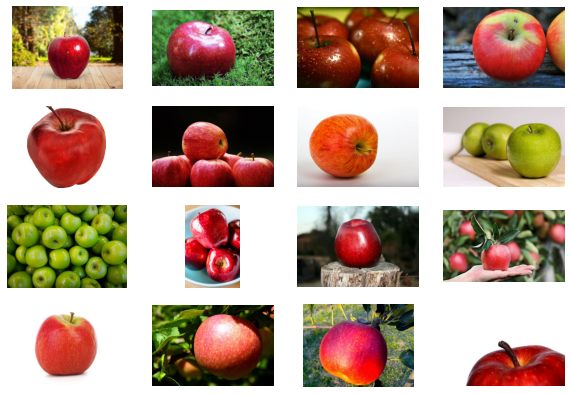

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(10, 7))
for i in range(4):
    for j in range (4):
        image_data = requests.get(thumbnail_urls[i+4*j]) # downloads as bytes
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

## Downloading an image

In [11]:
image = requests.get("https://pixnio.com/free-images/2017/11/10/2017-11-10-21-27-56.jpg")
open("downloaded_img.jpg", "wb").write(image.content)

491942

## Getting URLs for multiple images (for different search terms)

Let's write some code to get a bunch of images downloaded (we can turn the following into a script later).

In [12]:
# # Original search terms
# search_terms = ['apple',
#  'banana',
#  'beef',
#  'blueberries',
#  'carrots',
#  'chicken_wings',
#  'egg',
#  'honey',
#  'mushrooms',
#  'strawberries']

# New search terms (V2)
search_terms = ['Apple',
 'Artichoke',
 'BBQ sauce',
 'Bacon',
 'Bagel',
 'Banana',
 'Beef',
 'Beer',
 'Blueberries',
 'Bread',
 'Broccoli',
 'Butter',
 'Cabbage',
 'Candy',
 'Cantaloupe',
 'Carrot',
 'Carrots',
 'Cheese',
 'Chicken',
 'Chicken wings',
 'Cocktail',
 'Coconut',
 'Coffee',
 'Cookie',
 'Corn chips',
 'Cream',
 'Cucumber',
 'Dessert',
 'Doughnut',
 'Egg',
 'Fish',
 'Fries',
 'Grape',
 'Guacamole',
 'Hamburger',
 'Honey',
 'Ice cream',
 'Juice',
 'Lemon',
 'Lime',
 'Lobster',
 'Mango',
 'Milk',
 'Muffin',
 'Mushroom',
 'Mushrooms',
 'Olive oil',
 'Olives',
 'Onion',
 'Orange',
 'Orange juice',
 'Pancake',
 'Pasta',
 'Pastry',
 'Pear',
 'Pepper',
 'Pineapple',
 'Pizza',
 'Pomegranate',
 'Popcorn',
 'Potato',
 'Prawns',
 'Pretzel',
 'Pumpkin',
 'Radish',
 'Rice',
 'Rose',
 'Salad',
 'Salt',
 'Sandwich',
 'Sausages',
 'Seafood',
 'Shellfish',
 'Soft drink',
 'Spinach',
 'Squid',
 'Strawberries',
 'Strawberry',
 'Sushi',
 'Tea',
 'Tomato',
 'Tomato sauce',
 'Vegetable',
 'Waffle',
 'Watermelon',
 'Wine',
 'Zucchini']

In [14]:
import requests
import matplotlib.pyplot as plt
import streamlit as st

from PIL import Image
from io import BytesIO

API_KEY = st.secrets["microsoft_bing_image_search_key"]
SEARCH_URL = "https://api.bing.microsoft.com/v7.0/images/search"

# Number of images per page
COUNT = 150 # min 35, max 150, see "count" - https://docs.microsoft.com/en-us/bing/search-apis/bing-image-search/reference/query-parameters

headers = {"Ocp-Apim-Subscription-Key" : API_KEY}

# TODO
* Batch save images
* Batch delete images
* Add image metadata to CSV (for logging and exporting later)

In [15]:
import uuid
img_to_download_list = []
for search_term in search_terms:

    print(f"\n[INFO] Searching for {'search_term'} images...")
    params = {
        "q": search_term,
        "license": "public",
        "imageType": "photo",
        "count": COUNT
    }
    
    response = requests.get(SEARCH_URL, 
                            headers=headers, 
                            params=params)
    response.raise_for_status() # used for debugging
    search_results = response.json()

    print(f"[INFO] Found {search_results['totalEstimatedMatches']} potential image matches...")
    print("[INFO] Appending image URLs to dictionary... \n")
    for i, value in enumerate(search_results["value"]):
        img_metadata = {}

        # Give each image a UUID
        img_metadata["image_id"] = str(uuid.uuid4())

        # State the source of the image
        img_metadata["source"] = "microsoft_bing_image_search_api_v7"
        
        # Collect metadata about each image
        img_metadata["search_term"] = search_term
        img_metadata["img_url"] = value["contentUrl"]
        img_metadata["height"] = value["height"]
        img_metadata["width"] = value["width"]
        img_metadata["time_downloaded"] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        img_to_download_list.append(img_metadata)
        if i % 50 == 0:
            print(f"[INFO] Adding image url for '{search_term}': {img_metadata['img_url']}...")

img_to_download_list


[INFO]Searching for search_term images...
[INFO] Found 621 potential image matches...
[INFO] Appending image URLs to dictionary... 

[INFO] Adding image url for 'Apple': https://images.pexels.com/photos/211352/pexels-photo-211352.png?cs=srgb&dl=apple-apples-fruit-fruits-211352.jpg&fm=jpg...
[INFO] Adding image url for 'Apple': https://c.pxhere.com/photos/b7/41/red_apple_healthy_food_organic_imperfect_nutrition_fruit_vegan-594006.jpg!d...
[INFO] Adding image url for 'Apple': https://get.pxhere.com/photo/apple-nature-plant-fruit-food-green-produce-sour-flowering-plant-rose-family-crabapple-rosaceae-malus-granny-smith-crab-apples-land-plant-hardy-kiwi-wild-apple-1256943.jpg...

[INFO]Searching for search_term images...
[INFO] Found 349 potential image matches...
[INFO] Appending image URLs to dictionary... 

[INFO] Adding image url for 'Artichoke': https://images.pexels.com/photos/3912846/pexels-photo-3912846.jpeg?cs=srgb&dl=fresh-artichokes-3912846.jpg&fm=jpg...
[INFO] Adding image url 

[{'image_id': '1a2b82db-a902-4957-97c0-a731dd4cf886',
  'source': 'microsoft_bing_image_search_api_v7',
  'search_term': 'Apple',
  'img_url': 'https://images.pexels.com/photos/211352/pexels-photo-211352.png?cs=srgb&dl=apple-apples-fruit-fruits-211352.jpg&fm=jpg',
  'height': 1607,
  'width': 1530,
  'time_downloaded': '2021-12-16 15:17:54'},
 {'image_id': 'f59afccf-310c-479d-b226-007b203ec9b8',
  'source': 'microsoft_bing_image_search_api_v7',
  'search_term': 'Apple',
  'img_url': 'https://images.pexels.com/photos/588587/pexels-photo-588587.jpeg?cs=srgb&dl=apple-blur-bright-close-up-588587.jpg&fm=jpg',
  'height': 3000,
  'width': 4000,
  'time_downloaded': '2021-12-16 15:17:54'},
 {'image_id': 'e3eb79ef-4512-4e2d-8303-4f705e37d2b2',
  'source': 'microsoft_bing_image_search_api_v7',
  'search_term': 'Apple',
  'img_url': 'https://images.pexels.com/photos/693794/pexels-photo-693794.jpeg?cs=srgb&dl=pexels-rp-photography-693794.jpg&fm=jpg',
  'height': 2796,
  'width': 4017,
  'time_dow

In [16]:
import pandas as pd
targ_img_df = pd.DataFrame(img_to_download_list)
targ_img_df

,image_id,source,search_term,img_url,height,width,time_downloaded
0,1a2b82db-a902-4957-97c0-a731dd4cf886,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/211352/pexels...,1607,1530,2021-12-16 15:17:54
1,f59afccf-310c-479d-b226-007b203ec9b8,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/588587/pexels...,3000,4000,2021-12-16 15:17:54
2,e3eb79ef-4512-4e2d-8303-4f705e37d2b2,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/693794/pexels...,2796,4017,2021-12-16 15:17:54
3,ce795b12-d364-4352-a79b-1c469014ba64,microsoft_bing_image_search_api_v7,Apple,https://www.publicdomainpictures.net/pictures/...,1920,1920,2021-12-16 15:17:54
4,6bbc1774-713d-4445-8db0-a4060b11e1e1,microsoft_bing_image_search_api_v7,Apple,https://pixnio.com/free-images/2018/07/01/2018...,2264,3600,2021-12-16 15:17:54
...,...,...,...,...,...,...,...
13040,35ff8eab-83fa-462d-a77b-e2cd016f4d91,microsoft_bing_image_search_api_v7,Zucchini,https://live.staticflickr.com/3290/2936442587_...,375,500,2021-12-16 15:20:38
13041,0fceb075-e44e-4547-93e2-49cd4663ee36,microsoft_bing_image_search_api_v7,Zucchini,https://www.publicdomainpictures.net/pictures/...,389,615,2021-12-16 15:20:38
13042,2a5b7ffe-6f65-4131-9e80-03d525d1aa97,microsoft_bing_image_search_api_v7,Zucchini,https://publicdomainpictures.net/pictures/3400...,150,225,2021-12-16 15:20:38
13043,180747da-ba3b-4732-86f0-524dffd01239,microsoft_bing_image_search_api_v7,Zucchini,https://cdn.pixabay.com/photo/2017/04/04/18/00...,333,960,2021-12-16 15:20:38


In [17]:
targ_img_df.to_csv("data/100_target_images_metadata.csv")

In [20]:
len(targ_img_df)

13045

## Downloading data for multiple URLs

Now we have a bunch of URLs, let's download data.

In [21]:
# List of exceptions, source: https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/
from requests import exceptions
EXCEPTIONS = set([IOError, FileNotFoundError,
	exceptions.RequestException, exceptions.HTTPError,
	exceptions.ConnectionError, exceptions.Timeout])

In [22]:
img_to_download_list[0]

{'image_id': '1a2b82db-a902-4957-97c0-a731dd4cf886',
 'source': 'microsoft_bing_image_search_api_v7',
 'search_term': 'Apple',
 'img_url': 'https://images.pexels.com/photos/211352/pexels-photo-211352.png?cs=srgb&dl=apple-apples-fruit-fruits-211352.jpg&fm=jpg',
 'height': 1607,
 'width': 1530,
 'time_downloaded': '2021-12-16 15:17:54'}

## Download images

In [23]:
import os
import uuid

TARG_DIR = "data/100_foods"
if not os.path.exists(TARG_DIR):
    print(f"[INFO] Making directory: {TARG_DIR}...")
    os.makedirs(TARG_DIR, exist_ok=True)
else:
    print(f"[INFO] Directory '{TARG_DIR}' exists, skipping creation...")

# Make target dirs
for search_term in search_terms: 
    os.makedirs(os.path.join(TARG_DIR, search_term))

# Download images...
print(f"Attempting to download {len(img_to_download_list)} images... \n")
for i, img_dict in enumerate(img_to_download_list):
    i += 1
    img_id = img_dict["image_id"]
    img_url = img_dict["img_url"]
    search_term = img_dict["search_term"]
    try:
        # Get the image
        img_data = requests.get(img_url, timeout=30)

        # Write image to file
        class_dir = os.path.join(TARG_DIR, search_term)
        save_path = os.path.join(class_dir, 
                                 img_id + ".jpg")
        f = open(save_path, "wb")
        f.write(img_data.content)
        f.close()
    
    # If the image doesn't download, skip it 
    except Exception as e:
        if type(e) in EXCEPTIONS:
            print(f"Skipping image: {img_url} due to exception: {e}")
            continue    

    if i % 50 == 0:
        print(f"Images downloaded successfully for {search_term}: {len(os.listdir(class_dir))}")

[INFO] Making directory: data/100_foods...
Attempting to download 13045 images... 

Images downloaded successfully for Apple: 50
Images downloaded successfully for Apple: 100
Images downloaded successfully for Apple: 150
Images downloaded successfully for Artichoke: 50
Images downloaded successfully for Artichoke: 100
Images downloaded successfully for Artichoke: 150
Images downloaded successfully for BBQ sauce: 50
Images downloaded successfully for BBQ sauce: 100
Images downloaded successfully for BBQ sauce: 150
Images downloaded successfully for Bacon: 50
Images downloaded successfully for Bacon: 100
Images downloaded successfully for Bacon: 150
Images downloaded successfully for Bagel: 50
Images downloaded successfully for Bagel: 100
Images downloaded successfully for Bagel: 150
Images downloaded successfully for Banana: 50
Images downloaded successfully for Banana: 100
Images downloaded successfully for Banana: 150
Images downloaded successfully for Beef: 50
Images downloaded succe

## TODO: Delete images that don't work

TODO:
* Scan through downloaded images and if they don't work, delete them.
    * See this for scanning through directories to get subpath names: https://stackoverflow.com/a/2909998/7900723
* Also delete them from the CSV metadata file.

```python
# Pseudocode
for img_path in img_paths:
    try:
        open(img_path)

    # If it doesn't open, delete the image...
    except:
        os.remove(img_path)
        # CODE HERE TO DELTE FROM CSV FILE AS WELL???
        continue
```

In [24]:
import os
import pathlib # see here for more on PathLib - https://realpython.com/python-pathlib/
img_files_to_check = []
for path, subdirs, files in os.walk(TARG_DIR):
    for name in files:
        # print(name.split(".")[0])
        img_files_to_check.append(pathlib.Path(path, name))


In [25]:
# .stem gets the filename from a PosixPath (Path datatype) 
img_files_to_check[0].stem

'9b62adf9-0fb9-40eb-a684-7f87ac43f390'

In [26]:
broken_images = []
for img_file_path in img_files_to_check:
    # Check images downloaded and delete if bogus
    try:
        image_id = img_file_path.stem # get image id
        Image.open(img_file_path) # if this fails, the target image should be deleted... 
    except Exception as e:
        broken_images.append(image_id)
        print(f"Image: {image_id} is broken because: {e}...")
        print(f"Deleting image... total images removed: {len(broken_images)}")
        os.remove(img_file_path)
        continue

Image: b7e704c7-22ee-4abf-8088-3e4e9ba5a657 is broken because: cannot identify image file '/Users/daniel/code/nutrify/data/100_foods/Apple/b7e704c7-22ee-4abf-8088-3e4e9ba5a657.jpg'...
Deleting image... total images removed: 1
Image: b04c9868-261c-4ab9-aa18-323925e9a46b is broken because: cannot identify image file '/Users/daniel/code/nutrify/data/100_foods/Apple/b04c9868-261c-4ab9-aa18-323925e9a46b.jpg'...
Deleting image... total images removed: 2
Image: e43d92dc-045c-43e3-a149-5ad9443150b5 is broken because: cannot identify image file '/Users/daniel/code/nutrify/data/100_foods/Apple/e43d92dc-045c-43e3-a149-5ad9443150b5.jpg'...
Deleting image... total images removed: 3
Image: 461e3982-0ccf-45d6-b53e-6e30b4cdce8a is broken because: cannot identify image file '/Users/daniel/code/nutrify/data/100_foods/Apple/461e3982-0ccf-45d6-b53e-6e30b4cdce8a.jpg'...
Deleting image... total images removed: 4
Image: 293562ad-4869-449b-8c05-f9bb639608b5 is broken because: cannot identify image file '/User

In [27]:
broken_images[:10]

['b7e704c7-22ee-4abf-8088-3e4e9ba5a657',
 'b04c9868-261c-4ab9-aa18-323925e9a46b',
 'e43d92dc-045c-43e3-a149-5ad9443150b5',
 '461e3982-0ccf-45d6-b53e-6e30b4cdce8a',
 '293562ad-4869-449b-8c05-f9bb639608b5',
 '3dbbe0d0-7622-44c4-91fb-6f4a522c3696',
 '510fae92-5693-4baa-883a-bcae7bde9227',
 'cbe0a834-3744-47c2-a402-be8fd268ffee',
 'bf0d3324-2055-4be3-856d-9a53b07c8b2c',
 '883aba0f-52e1-4c95-a419-f6cccf4167b4']

This error occurs when PIL.Image can't open a file:

```
UnidentifiedImageError: cannot identify image file '10_whole_foods_test/apple/47a052b0-c5ee-4e42-9352-0b4f278d0e6d.jpg'
```

So we can use an exception to skip/delete it when it comes across it.

UPTOHERE:

another error appears...

```
Deleting image: 10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg due to cannot identify image file '10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg'...
Deleting image: 10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg due to [Errno 2] No such file or directory: '10_whole_foods_test/banana/1d5388dd-01c2-4aae-b7b0-d09f0e7e67f6.jpg'...
```

Looks like it doubled up on itself? 

Could remove that code and then check the directory once it's done and delete any images that are corrupt:

1. Save all images to directory (batch save)
2. Scan all saved images and delete if corrupt (batch delete)
3. Move to next class...

```python
 Check images downloaded and delete if bogus
        try:
            Image.open(save_path)
            
        except Exception as e:
            print(f"Deleting image: {save_path} due to {e}...")
            os.remove(save_path)
            continue
```

## TODO: Update metadata to reflect deleted images

In [28]:
targ_img_df.head()

,image_id,source,search_term,img_url,height,width,time_downloaded
0,1a2b82db-a902-4957-97c0-a731dd4cf886,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/211352/pexels...,1607,1530,2021-12-16 15:17:54
1,f59afccf-310c-479d-b226-007b203ec9b8,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/588587/pexels...,3000,4000,2021-12-16 15:17:54
2,e3eb79ef-4512-4e2d-8303-4f705e37d2b2,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/693794/pexels...,2796,4017,2021-12-16 15:17:54
3,ce795b12-d364-4352-a79b-1c469014ba64,microsoft_bing_image_search_api_v7,Apple,https://www.publicdomainpictures.net/pictures/...,1920,1920,2021-12-16 15:17:54
4,6bbc1774-713d-4445-8db0-a4060b11e1e1,microsoft_bing_image_search_api_v7,Apple,https://pixnio.com/free-images/2018/07/01/2018...,2264,3600,2021-12-16 15:17:54


In [29]:
# Remove broken images from targ_img_df
# Look at the targ img df and filter for images "not in" the broken images
targ_img_df_good = targ_img_df[~targ_img_df["image_id"].isin(broken_images)]
targ_img_df_good.head()

,image_id,source,search_term,img_url,height,width,time_downloaded
0,1a2b82db-a902-4957-97c0-a731dd4cf886,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/211352/pexels...,1607,1530,2021-12-16 15:17:54
1,f59afccf-310c-479d-b226-007b203ec9b8,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/588587/pexels...,3000,4000,2021-12-16 15:17:54
2,e3eb79ef-4512-4e2d-8303-4f705e37d2b2,microsoft_bing_image_search_api_v7,Apple,https://images.pexels.com/photos/693794/pexels...,2796,4017,2021-12-16 15:17:54
4,6bbc1774-713d-4445-8db0-a4060b11e1e1,microsoft_bing_image_search_api_v7,Apple,https://pixnio.com/free-images/2018/07/01/2018...,2264,3600,2021-12-16 15:17:54
5,067c6e8c-22d2-4084-9fd6-f1b652f1f205,microsoft_bing_image_search_api_v7,Apple,https://pixnio.com/free-images/2017/11/10/2017...,3880,5820,2021-12-16 15:17:54


In [30]:
len(targ_img_df_good)

11463

## Verify that images in saved folder are in metadata csv

In [31]:
# !rm 10_whole_foods_test/.DS_Store

In [32]:
TARG_DIR

'data/100_foods'

In [33]:
# Get list of saved images 
import os
import pathlib # see here for more on PathLib - https://realpython.com/python-pathlib/
saved_image_ids = []
for path, subdirs, files in os.walk(TARG_DIR):
    for name in files:
        # print(name.split(".")[0])
        saved_image_ids.append(pathlib.Path(path, name).stem)
saved_image_ids[:10]

['9b62adf9-0fb9-40eb-a684-7f87ac43f390',
 '9d5d7de2-1bbe-43fb-9c11-4988123a5458',
 '78f16799-9c6a-4c89-b5b8-998130a6f43c',
 '5d98c404-39b7-4228-ab44-b95483e49eaa',
 '587e5bb0-f5e4-4915-a411-a6137ced5029',
 '98559c26-36a7-42d2-a8f7-adfff4b49fb7',
 '8d7cea9e-dc78-4a00-8c46-688ad6efb1d9',
 '2b60d043-7ab0-48cf-b495-978b3e462cbc',
 'bcdbf0fd-f392-4223-bba0-af6be1b55f0f',
 '6b0f981d-a45f-4433-a580-f34204d9844e']

In [34]:
print(len(targ_img_df_good))
targ_img_df_good = targ_img_df_good[targ_img_df_good["image_id"].isin(saved_image_ids)]
print(len(targ_img_df_good))

11463
11420


In [35]:
assert sorted(saved_image_ids) == sorted(targ_img_df_good.image_id.tolist())

## Export the metadata CSV for later use

In [37]:
targ_img_df_good.to_csv("data/100_foods_metadata_updated.csv")